<a href="https://colab.research.google.com/github/sgcortes/KerasTensor/blob/master/04_NumPy_AssignmentSolved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style=“font-size:30px;“>NumPy Assignment</h1>

In this assignment, you will use NumPy to implement simple mathematical functions, which are the building blocks of a Neural Network and are therefore used very frequently in Deep Learning.

### Maximum Points: 30

<div>
    <table>
        <tr><td><h3>Section</h3></td> <td><h3>Problem</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>Leaky ReLu Implementation</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>Sigmoid Implementation</h3></td> <td><h3>10</h3></td> </tr>
        <tr><td><h3>3</h3></td> <td><h3>Convolution Implementation</h3></td> <td><h3>10</h3></td> </tr>
    </table>
</div>

In [ ]:
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
block_plot = False

## 1 Leaky ReLU [10 Points]


<img src='https://learnopencv.com/wp-content/uploads/2022/02/c4_01_leaky_relu.png' width=600 align=‘center’><br/>


Let’s first see how to implement **Leaky ReLU**:


$$
f(x) = \left\{
  \begin{array}\\
  x\alpha&\mbox{if }x<0\\
  x&\mbox{otherwise }\\
  \end{array}
\right\}
$$

For the following input:

$$
x = [-0.7329559\;1.23146666]\;,\alpha=0.03
$$

LeakyReLu will return:

$$
[-0.02198868\;1.23146666]
$$

In [ ]:
def leaky_relu(array: np.ndarray, alpha: float) -> np.ndarray:

    """
    leaky_relu

    x >= 0 -> f(x) = x
    x < 0 -> f(x) = alpha * x

    Parameters

    array: Input array.
    alpha: Slope for the activation
           when input is negative.

    Returns:

    Returns an array having the same shape as the input.
    """

    _array = array.copy()
    ###
    mask_menor = _array < 0
    mask_mayor = _array >= 0
    _array = array * mask_menor * alpha + array * mask_mayor
    ###

    return _array

In [ ]:
inArray = np.array([-0.7329559, 1.23146666])

print(leaky_relu(inArray, 0.03))

[-0.02198868  1.23146666]


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## 2 Sigmoid [10 Points]


<img src='https://learnopencv.com/wp-content/uploads/2022/02/c4_01_sigmoid.png' width=600 align=‘center’>

Next, we implement **Sigmoid**:


$$\frac{1}{1 + e^{-x}}$$

For the given input:

$$
[-2.39537836\;-0.09620075]
$$

Sigmoid returns:

$$
[0.0835258\;0.47596834]
$$

In [ ]:
def sigmoid(array: np.ndarray) -> np.ndarray:

    """
    sigmoid

    f(x) = 1 / (1 + e^-x)

    Parameters

    array: Input array.

    Returns

    Returns an array having the same shape as input
    """
    
    sig_cal = None
    ###
    den = 1 + np.exp(-inArray)
    num = np.ones(inArray.shape)
    sig_cal = num / den 
    ###
    
    return sig_cal

In [ ]:
inArray = np.array([-2.39537836, -0.09620075])
sigmoidResult = sigmoid(inArray)

print(f"Input: {inArray}")
print(f"Result: {sigmoidResult}")

Input: [-2.39537836 -0.09620075]
Result: [0.0835258  0.47596834]


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


## 3 The Convolution Operation [10 Points]

Today, Convolutional Neural Networks (CNNs) are among the most widely-used architectures in the field of Computer Vision. One of the most fundamental operations performed in CNNs is the **Convolution Operation**.

**Now, what is a convolution operation?**

A convolution operation is the element-wise multiplication, of a "kernel" (or filter) with a region of an input image, followed by a summing operation, performed iteratively on the whole image.

This illustration will make things more clear. Assume that your input is a 2D array, of size `5 x 5`, having the following values:


\begin{bmatrix}
7 & 2 & 3 & 3 & 8\\
4 & 5 & 3 & 8 & 4\\
3 & 3 & 2 & 8 & 4\\
2 & 8 & 7 & 2 & 7\\
5 & 4 & 4 & 5 & 4
\end{bmatrix}

And the kernel is of size `3 x 3`, with values:

\begin{bmatrix}
1 & 0 & -1 \\
1 & 0 & -1 \\
1 & 0 & -1 \\
\end{bmatrix}

The convolution operation of this kernel with the 2D input array is summarized in the followinf steps.

### **Step 1:**
<img src = 'https://learnopencv.com/wp-content/uploads/2022/01/c4_01_cnn_conv_step_1.jpg' width=800 align='center'><br/>

### **Step 2:**
<img src = 'https://learnopencv.com/wp-content/uploads/2022/01/c4_01_cnn_conv_step_2.jpg' width=800 align='center'><br/>

### **Step 3:**
<img src = 'https://learnopencv.com/wp-content/uploads/2022/01/c4_01_cnn_conv_step_3.jpg' width=800 align='center'><br/>

### **Step 4:**
<img src = 'https://learnopencv.com/wp-content/uploads/2022/01/c4_01_cnn_conv_step_4.jpg' width=800 align='center'><br/>

In the above figures, **`*`** represents the convolution operation. Continue these series of operations untill we get the final output, as shown below: 

<img src = 'https://learnopencv.com/wp-content/uploads/2022/01/c4_01_cnn_conv_output.jpg' width=200 align='center'><br/>
     

In general, the size of the output after the Convolution operation is given by the formula:

$$\lfloor{\frac{n + 2p - k}{s}}\rfloor + 1$$ 

where `n` = Input shape, `p` = padding , `k`= kernel_size and `s` = stride;


**Note: For this assignment, you need not worry about the padding and stride. We have kept them at `0` and `1` respectively.**

**So, here, the output shape is given by: $$n - k + 1$$**

Taking the above example as a reference, we have `n = 5` and `k = 3`. Therefore, the output shape is given by:
`5 - 3 + 1 = 3`. Thus the output shape is a `3 x 3` square matrix.

In the following section, you will be implementing the Convolution operation.

**Again, to simplify it for you, we will be dealing only with square matrices here.**

In [ ]:
def convolve(
    input_array: np.ndarray,
    kernel: np.ndarray,
    verbose: bool = False,
) -> np.ndarray:

    """
    convolve

    Parameters

    input_array: Array on which convolution is done.
    output_image: Placeholder array for output.
    kernel: Kernel/ Filter.
    
    Returns

    Convolved array.
    """

    inshape = input_array.shape
    kshape = kernel.shape

    output_array = np.zeros((inshape[0] - kshape[0] + 1, inshape[1] - kshape[1] + 1))

    for i in range(0, input_array.shape[0]):
        for j in range(0, input_array.shape[1]):
            try:
                
                ###
                output_array[i,j] = np.sum(kernel * input_array[i:i+kshape[0],j:j+kshape[1]])
                ###
            
            except Exception as exception:
                if verbose:
                    print("WARN: Image boundary is ignored.")
                    raise exception

    return output_array.astype(np.int32)

**Running the below cell, you should get the output as:**

```
Output array:
[[ 6 -9 -8]
 [-3 -2 -3]
 [-3  0 -2]]
 
```

In [ ]:
kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

input_array = np.array([[7,2,3,3,8],[4,5,3,8,4],[3,3,2,8,4],[2,8,7,2,7],[5,4,4,5,4]])
ouput_array = convolve(input_array, kernel)

print(f"Output array:")
print(ouput_array)

Output array:
[[ 6 -9 -8]
 [-3 -2 -3]
 [-3  0 -2]]


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


### Applications of CNNs

CNNs are excellent for determining the spatial information of the input images, such as edges, gradients etc. We will use the above `convolve()` function to show you how it can determine both vertical and horizontal edges of a given input image. To generate the vertical edges of an image, we place high values on one vertical half and low values on the other.


In [ ]:
def create_vertical_edge_image(dsize: Tuple = (64, 64)) -> np.ndarray:

    """
    create_vertical_edge_image

    A vertical edged test image is created.
    For input dsize=(4, 4), the below array
    is returned.

    [255 255 0 0
     255 255 0 0
     255 255 0 0]

    Parameters
    ----------

    dsize: Shape of the image to create. The
    shape is of the form (height, width).

    Returns
    -------

    A numpy array with shape dsize
    """

    height, width = dsize
    image = np.zeros(dsize, dtype=int)
    split = width // 2
    image[:, :split] = 255

    return image

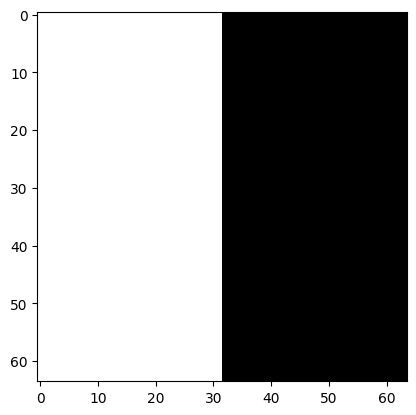

In [ ]:
test_image = create_vertical_edge_image(dsize=(64,64))

plt.imshow(test_image, cmap="gray")
plt.show(block=block_plot)


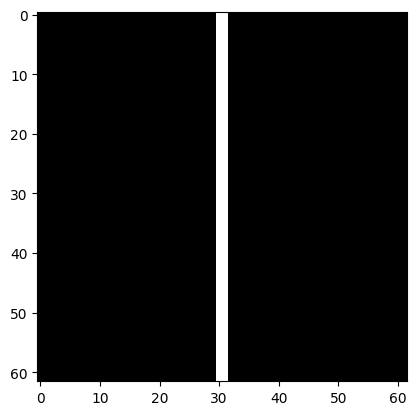

In [ ]:
vertical_kernel = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

vertical_edge = convolve(test_image, vertical_kernel)

plt.imshow(vertical_edge, cmap="gray")
plt.show(block=block_plot)

As you can see, we could successfully determine the vertical edges for the `test_image`. Now let’s use the convolution function to determine the horizontal edges as well. Similarly, to generate the horizontal edges of an  image, we will place high values on one horizontal half and low values on the other.

In [ ]:
def create_horizontal_edge_image(dsize: Tuple = (64, 64)) -> np.ndarray:

    """
    create_horizontal_edge_image

    A vertical edged test image is created.
    For input dsize=(4, 4), the below array
    is returned.

    [255 255 255 255
     255 255 255 255
     000 000 000 000
     000 000 000 000]

    Parameters
    ----------

    dsize: Shape of the image to create. The
    shape is of the form (height, width).

    Returns
    -------

    A numpy array with shape dsize
    """

    height, width = dsize
    image = np.zeros(dsize, dtype=int)
    split = height // 2
    image[:split, :] = 255

    return image

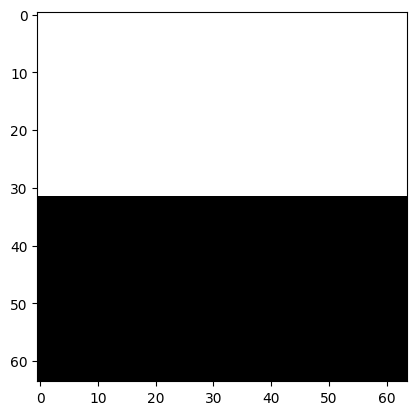

In [ ]:
input_image = create_horizontal_edge_image()

plt.imshow(input_image, cmap="gray")
plt.show(block=block_plot)

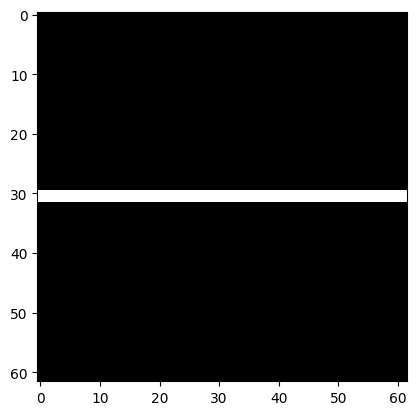

In [ ]:
horizontal_kernel = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])

horizontal_edge = convolve(input_image, horizontal_kernel)

plt.imshow(horizontal_edge, cmap="gray")
plt.show(block=block_plot)